##ASSIGNMENT 4
#PART - A

In [59]:
#import libraries 
import numpy as np 
import pandas as pd
import cv2 
import matplotlib.pyplot as plt

#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply prewitt filter
#b) apply sobel filter
#then output the resulting image

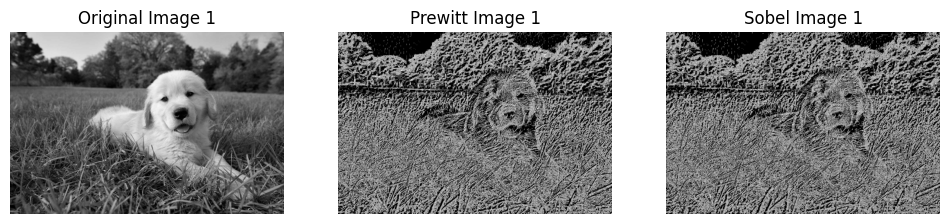

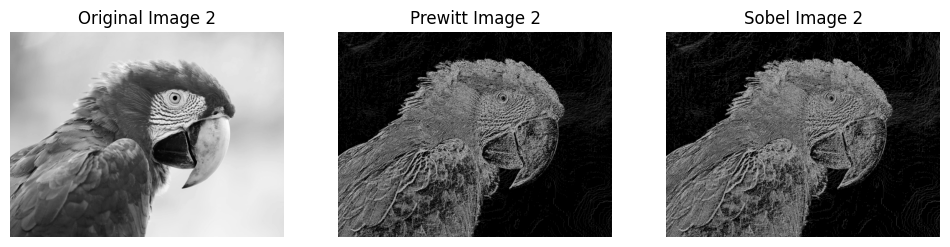

In [60]:
def apply_filter(image,filter):

    if filter=='prewitt': 
         x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
         y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) 
    if filter=='sobel':
         x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
         y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]]) 


    filtered_x = cv2.filter2D(image, -1, x)
    filtered_y = cv2.filter2D(image, -1, y)
    filtered = np.sqrt(filtered_x ** 2 + filtered_y ** 2) 
    filtered = np.uint8(filtered) 
    return filtered 

image1=cv2.imread('/Users/shrutisekhar/Desktop/icg project/GettyImages-185743593-2000-507c6c8883a44851885ea4fbc10a2c9e.jpg',cv2.IMREAD_GRAYSCALE) 
image2=cv2.imread('/Users/shrutisekhar/Desktop/icg project/shouts-animals-watch-baby-hemingway.jpg.webp',cv2.IMREAD_GRAYSCALE) 


prewit1=apply_filter(image1,'prewitt')
sobel1=apply_filter(image1,'sobel')
prewit2=apply_filter(image2,'prewitt') 
sobel2=apply_filter(image2,'sobel')  

def display_images(original, prewitt, sobel, title):
            plt.figure(figsize=(12, 8))

            plt.subplot(1, 3, 1)
            plt.imshow(original, cmap='gray')
            plt.title(f'Original {title}')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(prewitt, cmap='gray')
            plt.title(f'Prewitt {title}')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(sobel, cmap='gray')
            plt.title(f'Sobel {title}')
            plt.axis('off')

            plt.show() 

display_images(image1, prewit1, sobel1, 'Image 1')
display_images(image2, prewit2, sobel2, 'Image 2')


Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)



### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [61]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [62]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.


In [63]:
def corr2d(X: np.array, K: np.array) -> np.array: 
   h_x,w_x=X.shape
   h_k,w_k=K.shape
   Y=np.zeros((h_x-h_k+1,w_x-w_k+1))
   for i in range(h_x-h_k+1):
     for j in range(w_x-w_k+1):
       Y[i][j]=np.sum(X[i:i+h_k,j:j+w_k]*K)
   return Y

In [64]:
K = np.array([1.0, -1.0], dtype=np.float32) # kernel, you need to learn this using a model 

K=K.reshape((1, K.shape[0])) 
X=np.squeeze(X) 

Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [65]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [66]:
#use the above corr2d in model

class model:
    def __init__(self,lr,epochs):
      #Write your code here 
        self.lr=lr 
        self.epochs=epochs
        self.K=None
    def fit(self,X,Y):
      #Write your code here 
        n_x, c_x, h_x, w_x = X.shape
        n_y, c_y, h_y, w_y = Y.shape  
        h_k=h_x-h_y+1 
        w_k=w_x-w_y+1
        self.K = np.random.randn(1, c_x, h_k, w_k) 
        print('k shape:',self.K.shape) 
        print('x shape:',X.shape) 
        

        for epoch in range(self.epochs): 
          y_pred = np.zeros((n_y, c_y, h_y, w_y))
          for i in range(n_y):
                for j in range(c_y):
                    y_pred[i, j] = corr2d(X[i, j], self.K[0, 0])  
                    #corr2d computes correlation for 2d matrices, so we iterate through the number of samples and then through each channel.  

          #loss is mse
          loss = np.sum((Y - y_pred)**2)  

          #shape of grad must be same as k
          grad = np.zeros_like(self.K)  

          for i in range(n_x):
                for j in range(c_x):
                    for k in range(h_k):
                        for l in range(w_k):
                            grad[0, 0, k, l] += np.sum((y_pred[i, j] - Y[i, j]) * X[i, j, k:h_y+k, l:w_y+l])#this is corresponding image region
            
          grad = grad * 2 / (n_x * n_y)
          self.K = self.K - self.lr * grad
            
          print("Epoch:", epoch+1, "  Loss:", loss,'Kernel:',self.K)
            



In [67]:
gd = model(3e-2,100)
gd.fit(X,Y)

k shape: (1, 1, 1, 2)
x shape: (1, 1, 6, 8)
Epoch: 1   Loss: 113.06829718091811 Kernel: [[[[2.13789253 0.0580711 ]]]]
Epoch: 2   Loss: 72.35295835480647 Kernel: [[[[ 0.14715741 -1.90392831]]]]
Epoch: 3   Loss: 46.301489393010236 Kernel: [[[[ 1.71905579 -0.31363907]]]]
Epoch: 4   Loss: 29.631149351941172 Kernel: [[[[ 0.44829567 -1.57262904]]]]
Epoch: 5   Loss: 18.963196724356163 Kernel: [[[[ 1.45642926 -0.55696256]]]]
Epoch: 6   Loss: 12.13614326616896 Kernel: [[[[ 0.6444987  -1.36407206]]]]
Epoch: 7   Loss: 7.767007730061323 Kernel: [[[[ 1.29057199 -0.7149133 ]]]]
Epoch: 8   Loss: 4.97083417310577 Kernel: [[[[ 0.77149182 -1.23201877]]]]
Epoch: 9   Loss: 3.1813130737026185 Kernel: [[[[ 1.18533417 -0.81691261]]]]
Epoch: 10   Loss: 2.036031848683631 Kernel: [[[[ 0.85335034 -1.14808759]]]]
Epoch: 11   Loss: 1.3030568939856386 Kernel: [[[[ 1.11835504 -0.88256524]]]]
Epoch: 12   Loss: 0.8339549829860047 Kernel: [[[[ 0.90597857 -1.09461041]]]]
Epoch: 13   Loss: 0.5337306037251397 Kernel: [[[[

In [68]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE  

    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)
    # YOUR CODE ENDS HERE

    return X_pad

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


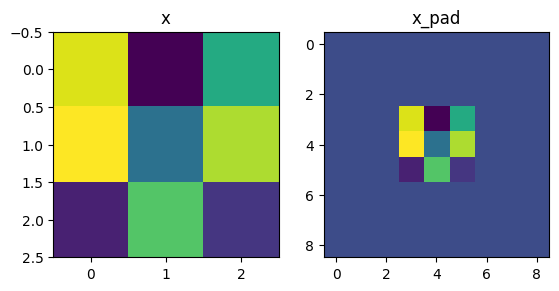

In [69]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3) 
#after padding 
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

import matplotlib.pyplot as plt
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [70]:

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """

    # YOUR CODE ENDS HERE 
    s = np.multiply(a_slice_prev, W)
    Z = np.sum(s)
    Z = Z + float(b)

    return Z

In [71]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


/var/folders/56/mnvdl1514j13zg9qgyyktz_00000gn/T/ipykernel_36692/4049480622.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [72]:
a_slice_prev.shape

(4, 4, 3)

In [73]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """  
    m,n_H_prev,n_W_prev,n_C_prev = A_prev.shape
    f,f,n_C_prev,n_C = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    Z = np.zeros((m, n_H, n_W, n_C)) 

    A_pad=zero_pad(A_prev,pad) 
    for i in range(m):  # Loop over the batch of training examples
        a_prev_pad = A_pad[i]  # Select ith padded activation
        for h in range(n_H):  # Loop over vertical axis of the output volume
            for w in range(n_W):  # Loop over horizontal axis of the output volume
                for c in range(n_C):  # Loop over channels (= #filters) of the output volume
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    # Use the corners to define the slice from a_prev_pad
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[:, :, :, c], b[:, :, :, c])

    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C)) 
    cache = (A_prev, W, b, hparameters)

    
 



    # YOUR CODE ENDS HERE

    return Z,cache

In [74]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)



Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]


/var/folders/56/mnvdl1514j13zg9qgyyktz_00000gn/T/ipykernel_36692/4049480622.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = Z + float(b)



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [75]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """

    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape

    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]

    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev

    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))

    for i in range(m):  # Loop over the batch of training examples
        for h in range(n_H):  # Loop over vertical axis of the output volume
            for w in range(n_W):  # Loop over horizontal axis of the output volume
                for c in range(n_C):  # Loop over channels (= #filters) of the output volume

                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f

                    # Use the corners to define the slice from a_prev_pad
                    a_slice_prev = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]

                    # Apply the pooling operation on the slice.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_slice_prev)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_slice_prev)

    # Making sure your output shape is correct
    assert (A.shape == (m, n_H, n_W, n_C))

    # YOUR CODE ENDS HERE 
    return A


  

In [76]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [77]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A= pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```